In [1]:
import replot
import numpy as np

/home/phyks/.local/share/virtualenvs/physique/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>


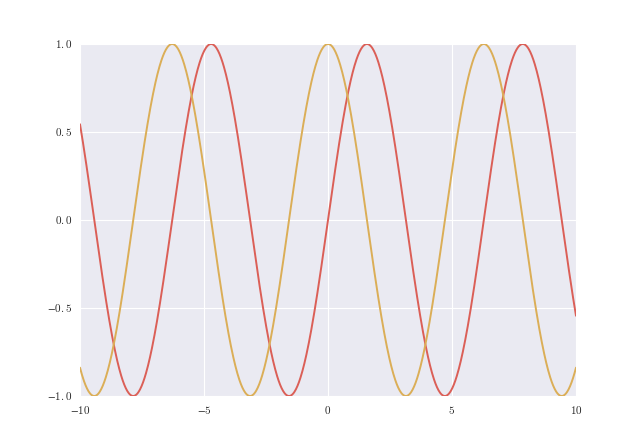

In [24]:
with replot.Figure() as figure:
    figure.plot(np.sin)
    figure.plot(np.cos)

<IPython.core.display.Javascript object>


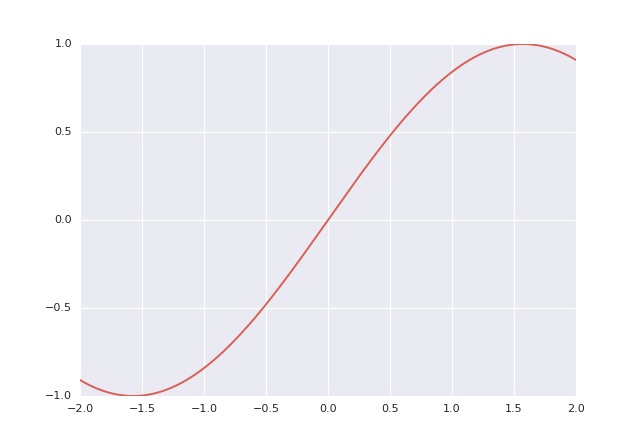

In [25]:
with replot.Figure() as figure:
    figure.plot(np.sin, (-2, 2))

<IPython.core.display.Javascript object>


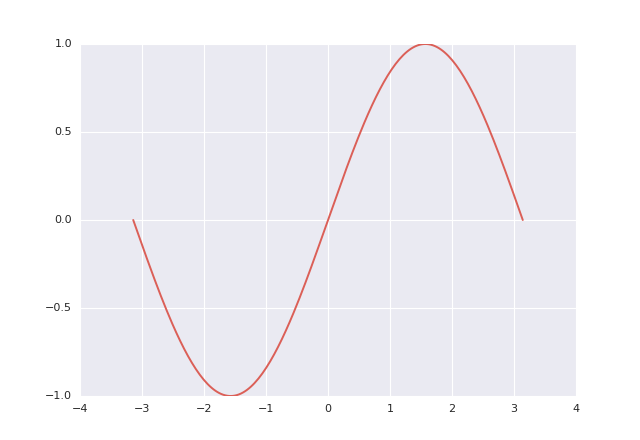

In [26]:
with replot.Figure() as figure:
    x = np.linspace(-np.pi, np.pi, 200)
    figure.plot(np.sin, x)

<IPython.core.display.Javascript object>


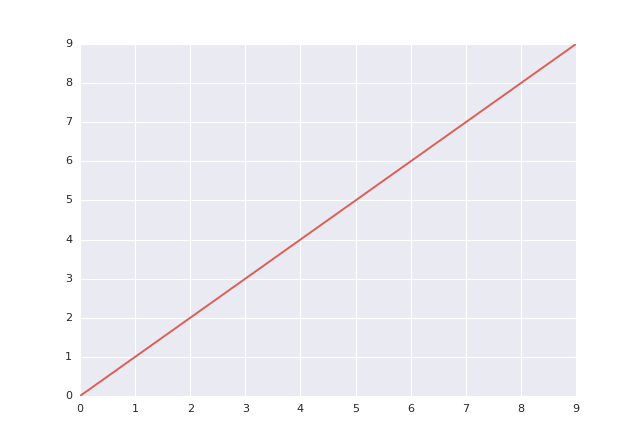

In [27]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x)

<IPython.core.display.Javascript object>


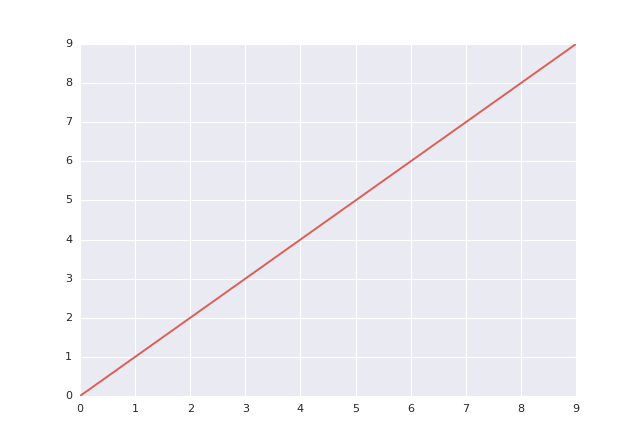

In [28]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x)

<IPython.core.display.Javascript object>


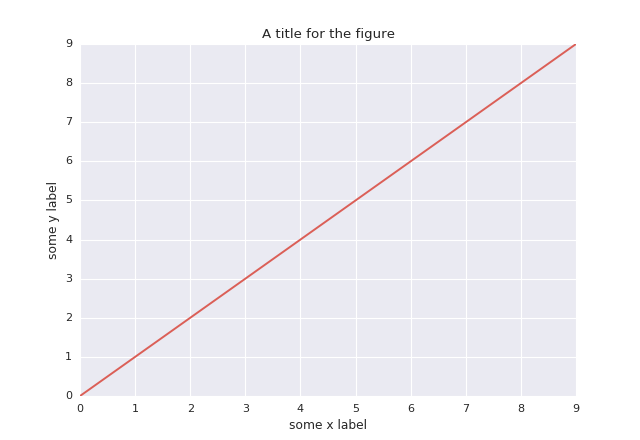

In [67]:
with replot.Figure() as figure:
    x = range(10)
    figure.plot(x, x, label="x")
    figure.xlabel = "some x label"
    figure.ylabel = "some y label"
    figure.title = "A title for the figure"

<IPython.core.display.Javascript object>


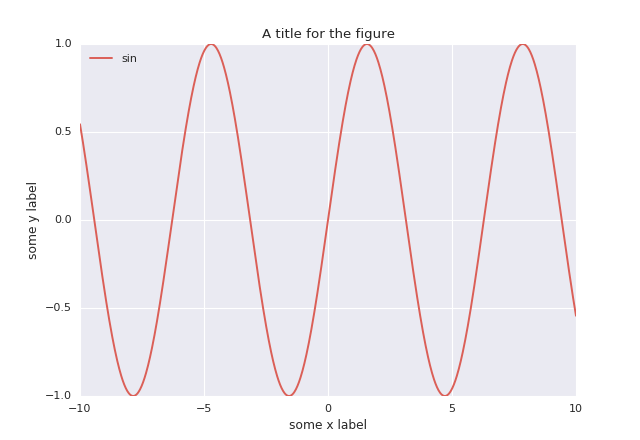

In [6]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend="best") as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


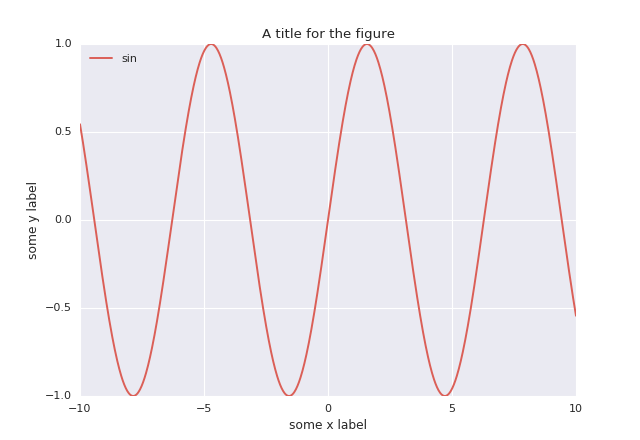

In [64]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


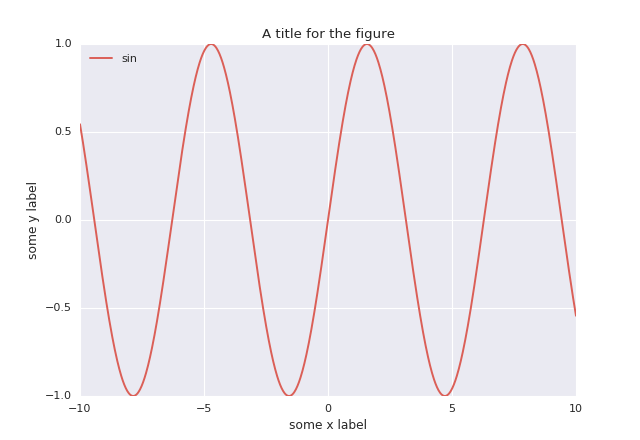

In [7]:
fig = replot.Figure(xlabel="some x label",
                      ylabel="some y label",
                      title="A title for the figure",
                      legend="best")
fig.plot(np.sin, label="sin")
fig.show()

<IPython.core.display.Javascript object>


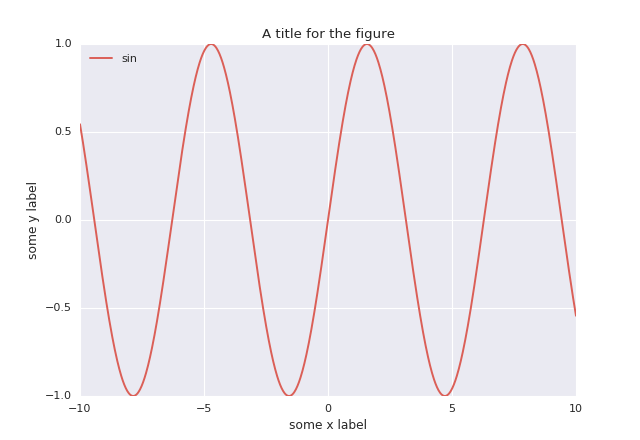

In [10]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure") as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


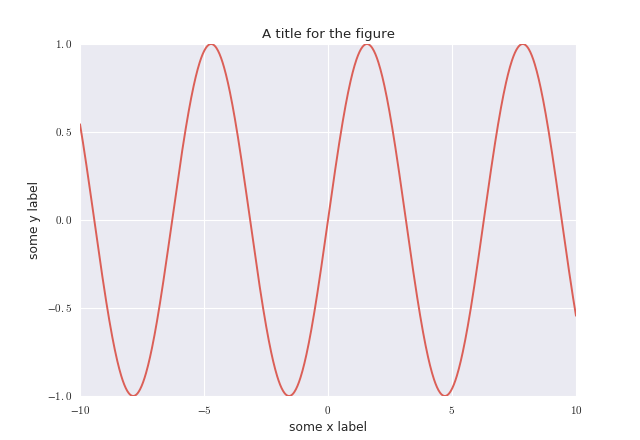

In [9]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=False) as figure:
    figure.plot(np.sin, label="sin")

<IPython.core.display.Javascript object>


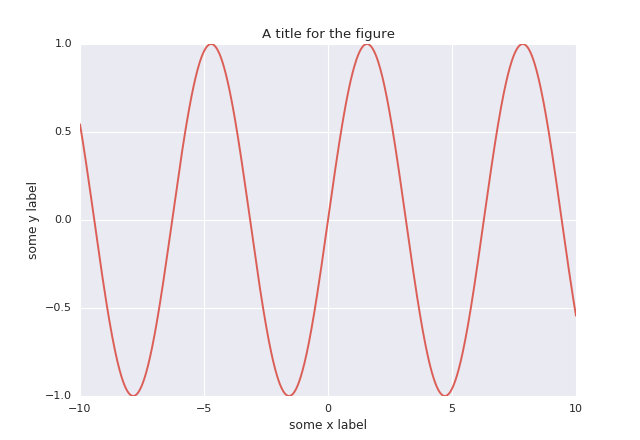

In [22]:
with replot.Figure(xlabel="some x label",
                     ylabel="some y label",
                     title="A title for the figure",
                     legend=True) as figure:
    figure.plot(np.sin)

<IPython.core.display.Javascript object>


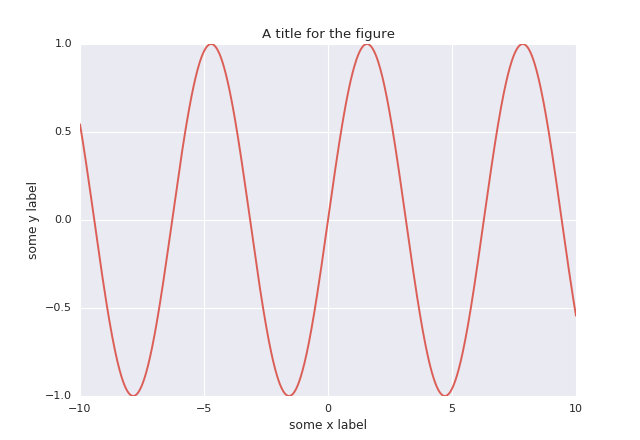

In [23]:
replot.plot([np.sin],
              xlabel="some x label",
              ylabel="some y label",
              title="A title for the figure",
              legend="best").show()